In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os

In [2]:
CONVERTED_DATABASE_NAME = '/home/ubuntu/HeLa_20KInt/HeLa_20KInt.sqlite'

In [3]:
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
frames_df = pd.read_sql_query("select * from frames where retention_time_secs >= 4430 and retention_time_secs <= 4440 order by scan ASC", db_conn)
db_conn.close()

In [4]:
frames_df.frame_id.min()

1875

In [5]:
frames_df.frame_id.max()

1880

In [6]:
frame_id = 1878

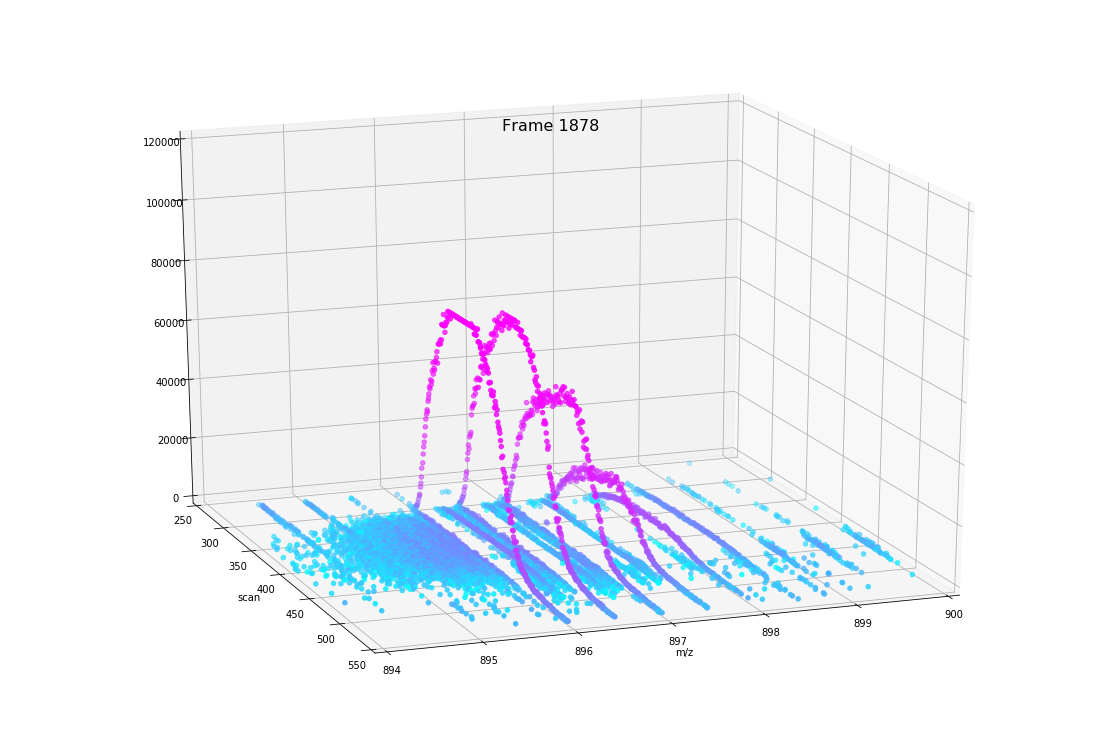

In [7]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)

ax = Axes3D(fig)

ax.elev = 20.0
ax.azim = 250.0
ax.dist = 10.0

plt.gca().invert_yaxis()
plt.xlabel('m/z')
plt.ylabel('scan')

mz_min = 894
mz_max = 900
scan_min = 250
scan_max = 550

# ax.set_xlim(left=200, right=1800)
# ax.set_ylim(bottom=900, top=0)
ax.set_xlim(left=mz_min, right=mz_max)
ax.set_ylim(bottom=scan_max, top=scan_min)
ax.set_zlim(bottom=0, top=120000)

frame_df = frames_df[frames_df.frame_id==frame_id]
clipped_frame_df = frame_df[(frame_df.mz >= mz_min) & (frame_df.mz <= mz_max) & (frame_df.scan >= scan_min) & (frame_df.scan <= scan_max)]

ax.scatter(clipped_frame_df.mz, clipped_frame_df.scan, clipped_frame_df.intensity, c=np.log(clipped_frame_df.intensity), cmap='cool')
fig.suptitle('Frame {}'.format(frame_id), fontsize=16, x=0.5, y=0.85)
plt.show()